In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from osdatahub import Extent, FeaturesAPI, NGD
import geojson
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['PROJ_NETWORK'] = 'OFF'

In [69]:
with open('sw2buff.geojson', encoding='UTF-8') as json_file:
    geojson = geojson.load(json_file)
df = gpd.GeoDataFrame.from_features(geojson["features"])
sw2bound = df['geometry']
sw2MultiPoly = sw2bound[0]

print(sw2MultiPoly)
print(type(sw2MultiPoly))

MULTIPOLYGON (((371777.5 274573.2, 371779.8 274572.3, 371782 274571.6, 371783.7 274571.4, 371785.3 274571.3, 371786.6 274571.3, 371788.5 274571.5, 371790.4 274571.8, 371790.6 274571.8, 371794.8 274572.2, 371795.7 274571.9, 371796.6 274571.4, 371797.4 274570.9, 371797.9 274570.5, 371800 274568.4, 371800.4148 274568.0774, 371800.9 274567.7, 371802 274567.1, 371803.1 274566.8, 371803.4 274566.7, 371804.2 274566.8, 371805 274567, 371805.7 274567.3, 371805.8466 274567.3433, 371810.1 274568.6, 371813.3 274567.9, 371816.9 274567, 371812.453 274549.3163, 371811.79 274546.68, 371817.49 274544.68, 371824.39 274543.38, 371831.69 274543.38, 371840.49 274544.18, 371844.69 274544.78, 371844.7891 274543.8887, 371844.79 274543.88, 371849.89 274544.08, 371854.99 274544.58, 371861.08 274546.07, 371860.79 274545.78, 371856.49 274539.18, 371856.29 274538.98, 371855.49 274538.28, 371854.59 274537.68, 371852.89 274537.08, 371849.69 274536.58, 371845.09 274535.98, 371844.29 274535.88, 371843.29 274535.58, 37

In [70]:
key = os.getenv('key')
ngd_collections = NGD.get_collections()
for collection in ngd_collections['collections']:
    product = collection["id"]
    #print(product)

In [71]:
# Choose data product
collection = "bld-fts-buildingpart"

# Define query extent
# Cathedral 384902, 254425, 385188, 254602 | GM   377342, 245797, 377915, 246151 | # CH   377696, 245838, 377931, 245983

W, S = (377696, 245838)
E, N = (377931, 245983)

crs = "EPSG:27700"
extent = Extent.from_bbox((W, S, E, N), crs=crs)

# Query API
ngd_building_part = NGD(key, collection)
bld_fts_results = ngd_building_part.query(extent=extent, crs=crs)

In [72]:
bld_fts_gdf = gpd.GeoDataFrame.from_features(bld_fts_results['features'], crs=crs)

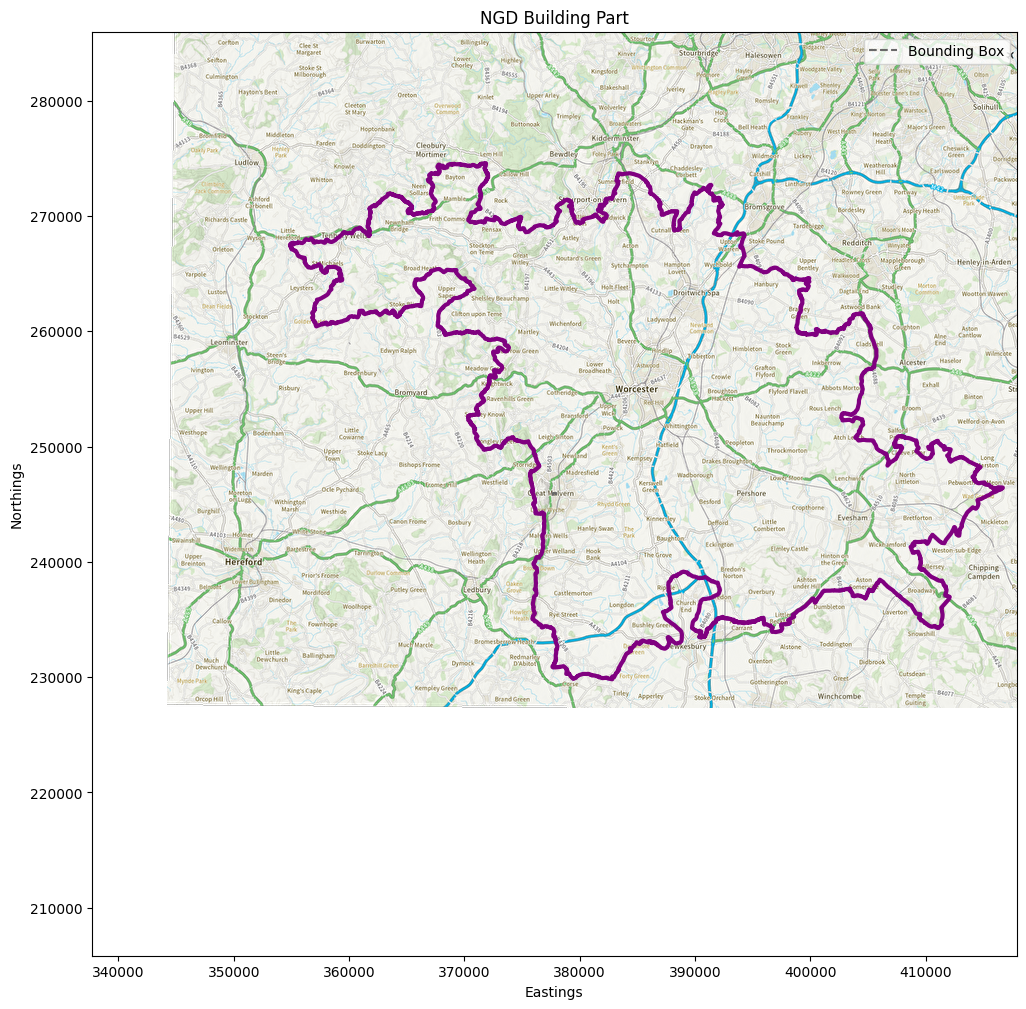

In [73]:
#ax = bld_fts_gdf.plot(color="grey", figsize=(14, 12))
#ax = df.plot(color="grey", figsize=(12, 12))
ax = df.plot(facecolor='none', edgecolor='purple', linewidth=3, figsize=(12, 12))

# Plot the query extent
ax.plot(*zip(*extent.polygon.exterior.coords), color="dimgray",
        linestyle='--', label="Bounding Box")

# Basemap
basemap_url = "https://api.os.uk/maps/raster/v1/zxy/Outdoor_3857/{z}/{x}/{y}.png?key=" + key
ctx.add_basemap(ax, source=basemap_url, crs=crs, interpolation="sinc")

# Define limits of the plot
bounds = extent.polygon.bounds
# margin adds a bit of space around the bounding box
margin = 40000
x_limits = (bounds[0] - margin, bounds[2] + margin)
y_limits = (bounds[1] - margin, bounds[3] + margin)
ax.set_xlim(*x_limits)
ax.set_ylim(*y_limits)

# Add labels
ax.set_xlabel("Eastings")
ax.set_ylabel("Northings")
ax.set_title("NGD Building Part")
plt.legend()
plt.show()